<a href="https://colab.research.google.com/github/mdurgasrikari/Durga_Srikari_INFO5731_Spring2024/blob/main/Maguluri_Durga_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


Latent Semantic Analysis (LSA)

In [25]:
# In this Program we will read the Amazon review data set from assignment 3, preprocess the data by removing missing value rows, stop words, punctuation, short words, and stemming, and add this
# cleaned data as a new column

import pandas as pd

# load data
df = pd.read_csv('Amazon_reviews_Assignment_3_Q4.csv')
print(df.shape)
df = df.dropna()
print(df.shape)


from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation \
                                        , preprocess_string, strip_short, stem_text

# preprocess given text
def preprocess(text):

    # clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(),
                                remove_stopwords,
                                strip_punctuation,
                                strip_short,
                                stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)

    return text

# apply function to all reviews
df['clean_text'] = df['Review'].apply(lambda x: preprocess(x))

# preview of dataset
df.head()

(79, 2)
(79, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Review Sentiment  \
0  This is a very stylish and functional product-...   Positve   
1  This product works as advertised. The buttons ...   Positve   
2  The case is nice but did not have a glow light...  Negative   
3  This product worked for about three minutes.  ...  Negative   
4  No power on the AC adapter. Tried several outl...  Negative   

                                          clean_text  
0  [stylish, function, product, fit, perfectli, e...  
1  [product, work, advertis, button, littl, hard,...  
2  [case, nice, glow, light, disappoint, product,...  
3  [product, work, minut, turn, then, plai, song,...  
4  [power, adapt, tri, outlet, confirm, usb, cabl...

In [26]:
# In this program we will create a dictionary and use a bag of words on preprocessed data and apply LSA to compute the coherence score for topics

from gensim import corpora

# create a dictionary with the corpus
corpus = df['clean_text']
dictionary = corpora.Dictionary(corpus)

# convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

# Coherence score in topic modeling to measure how interpretable the topics are to humans.
# find the coherence score with a different number of topics
for i in range(2,11):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['clean_text'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/lo

Coherence score with 2 clusters: 0.5267875477863915


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 3 clusters: 0.744227100914643


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 4 clusters: 0.673213268157484


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 5 clusters: 0.6679232182147988


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 6 clusters: 0.6383970102089119


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 7 clusters: 0.5822116252885979


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 8 clusters: 0.5478372482835012


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 9 clusters: 0.5536382735702007


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.



Coherence score with 10 clusters: 0.5127516704037389


In [27]:
# Based on the coherence score, I am choosing number of clusters as 3, as it has the highest coherence score
num_clusters = 3

# perform SVD on the bag of words with the LsiModel to extract 3 topics
lsi = LsiModel(bow, num_topics=num_clusters, id2word=dictionary)

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.499*"lyra" + 0.300*"rca" + 0.300*"playlist" + 0.234*"file" + 0.218*"audio" + 0.166*"20g" + 0.152*"that" + 0.150*"winamp" + 0.117*"hdd" + 0.117*"rd2850a".
Words in 1: -0.405*"wire" + -0.326*"lock" + -0.285*"board" + -0.195*"work" + -0.162*"solder" + -0.149*"easi" + -0.130*"kei" + -0.129*"remot" + -0.125*"didn" + -0.122*"good".
Words in 2: -0.358*"case" + -0.186*"good" + -0.184*"protector" + 0.181*"lock" + -0.174*"screen" + -0.173*"littl" + -0.169*"product" + -0.166*"radio" + 0.158*"board" + -0.154*"off".


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning:

Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning:

'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.

/usr/lo

We can see that 3 topics are extracted from the data. The first topic is related to the topic audio based on the keywords. The second Topic seems to be about hardware used in everyday work based on the keywords. The third topic looks related to electronics

In [28]:
# We will find the scores given between the review and each topic
corpus_lsi = lsi[bow]
scores = [[] for _ in range(num_clusters)]

for doc in corpus_lsi:
    for i in range(num_clusters):
        if len(doc) >= i + 1:
            scores[i].append(round(doc[i][1], 2))
        else:
            # Handle the case where the document doesn't have enough elements
            # You can decide how you want to handle such cases, for example, as in this case assign 0 scores
            scores[i].append(0.0)

# Create a data frame that shows scores assigned for each topic for each review
df_topic = pd.DataFrame()
df_topic['Text'] = df['Review']

for i in range(num_clusters):
    df_topic[f'Topic {i} score'] = scores[i]

# Determine the dominant topic for each review
df_topic['Dominant Topic'] = df_topic[[f'Topic {i} score' for i in range(num_clusters)]].idxmax(axis=1)

df_topic.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text  Topic 0 score  \
0  This is a very stylish and functional product-...           0.15   

   Topic 1 score  Topic 2 score Dominant Topic  
0          -0.83          -1.24  Topic 0 score

LDA

In [29]:
import pandas as pd

# load data
df = pd.read_csv('Amazon_reviews_Assignment_3_Q4.csv')
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(79, 2)
(79, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Review Sentiment
0  This is a very stylish and functional product-...   Positve
1  This product works as advertised. The buttons ...   Positve
2  The case is nice but did not have a glow light...  Negative
3  This product worked for about three minutes.  ...  Negative
4  No power on the AC adapter. Tried several outl...  Negative

In [30]:
# Load the regular expression library
import re
# Remove punctuation
df['Review_clean'] = \
df['Review'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['Review_clean'] = \
df['Review'].map(lambda x: x.lower())

# Print out the first rows of dataframe
df['Review'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:5: DeprecationWarning:

invalid escape sequence '\.'

<>:5: DeprecationWarning:

invalid escape sequence '\.'

<ipython-input-30-db5d7f506026>:5: DeprecationWarning:

invalid escape sequence '\.'



0    This is a very stylish and functional product-...
1    This product works as advertised. The buttons ...
2    The case is nice but did not have a glow light...
3    This product worked for about three minutes.  ...
4    No power on the AC adapter. Tried several outl...
Name: Review, dtype: object

In [31]:
# In this program we will use Gensim and NLTK to preprocess data and remove stopwords, punctuation and converting into tokenized words

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = df.Review_clean.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['stylish', 'functional', 'product', 'fits', 'dx', 'perfectly', 'easy', 'open', 'close', 'offers', 'protection', 'kindle', 'feels', 'good', 'hands', 'kind', 'mat', 'rubbery', 'feeling', 'neoprene', 'love', 'look', 'reservation', 'far', 'surface', 'neoprene', 'tends', 'show', 'fingerprints', 'little']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [33]:
# This program uses LDA to display 10 topics along with their keywords for each topic

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



[(0,
  '0.014*"br" + 0.008*"case" + 0.007*"work" + 0.007*"garmin" + 0.007*"ipod" + '
  '0.007*"little" + 0.006*"product" + 0.006*"power" + 0.006*"old" + '
  '0.006*"may"'),
 (1,
  '0.012*"radio" + 0.011*"card" + 0.008*"good" + 0.008*"screen" + 0.007*"get" '
  '+ 0.007*"see" + 0.006*"mp" + 0.006*"mirror" + 0.006*"likes" + 0.006*"br"'),
 (2,
  '0.020*"br" + 0.013*"good" + 0.010*"quality" + 0.009*"screen" + 0.009*"one" '
  '+ 0.008*"price" + 0.008*"buy" + 0.006*"get" + 0.006*"working" + 0.006*"go"'),
 (3,
  '0.021*"product" + 0.010*"good" + 0.009*"little" + 0.009*"like" + '
  '0.008*"get" + 0.006*"work" + 0.006*"back" + 0.006*"thing" + 0.005*"broke" + '
  '0.005*"arm"'),
 (4,
  '0.009*"lyra" + 0.009*"protective" + 0.009*"zen" + 0.009*"br" + 0.006*"case" '
  '+ 0.006*"still" + 0.006*"though" + 0.006*"actually" + 0.005*"rca" + '
  '0.005*"nice"'),
 (5,
  '0.024*"br" + 0.008*"would" + 0.007*"easy" + 0.007*"speaker" + '
  '0.007*"little" + 0.006*"also" + 0.006*"one" + 0.005*"front" + 0.005*"l

From the above output we can see that the top 10 topics are generated using the LDA model with thier corresponding keywords. Each topic is weighed by the importance of the topic. These topics emphasize on the theme of the corpus

In [34]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [12]:
#Visualize LDA model

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(LDAvis_prepared)

BERTopic

In [13]:
import pandas as pd

# load data
df = pd.read_csv('Amazon_reviews_Assignment_3_Q4.csv')
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(79, 2)
(79, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review Sentiment
0  This is a very stylish and functional product-...   Positve
1  This product works as advertised. The buttons ...   Positve
2  The case is nice but did not have a glow light...  Negative
3  This product worked for about three minutes.  ...  Negative
4  No power on the AC adapter. Tried several outl...  Negative

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['Review_clean'] = df.Review.apply(clean_text)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence '\('
<>:19: DeprecationWarning: invalid escape sequence '\('
<ipython-input-14-89d01d1b2766>:19: DeprecationWarning: invalid escape sequence '\('
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Review Sentiment  \
0  This is a very stylish and functional product-...   Positve   
1  This product works as advertised. The buttons ...   Positve   
2  The case is nice but did not have a glow light...  Negative   
3  This product worked for about three minutes.  ...  Negative   
4  No power on the AC adapter. Tried several outl...  Negative   

                                        Review_clean  
0  stylish functional product fits dx perfectly e...  
1  product works advertised buttons little hard p...  
2  case nice glow light 'm disappointed product n...  
3  product worked three minutes sometimes would t...  
4  power ac adapter tried several outlets confirm...

In [15]:
! pip install bertopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 16.4 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [16]:
from bertopic import BERTopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [17]:
reviews = df.Review_clean.to_list()

topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(reviews)

topic_model.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


Topic  Count                      Name  \
0     -1     49       -1_good_br_nt_radio   
1      0     18  0_product_screen_case_nt   
2      1     12          1_lyra_br_rca_mp   

                                      Representation  \
0  [good, br, nt, radio, use, iphone, buy, case, ...   
1  [product, screen, case, nt, little, protector,...   
2  [lyra, br, rca, mp, audio, nt, files, music, p...   

                                 Representative_Docs  
0  [dash cam works great unlike mini dash dvrs n'...  
1  [masque fits iphone s perfectly complaints fee...  
2  [great car use plus works stand alone mp playe...

In [18]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


BERTopic Bigrams

In [20]:
bigram_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
bigram_topics, bigram_probs = bigram_topic_model.fit_transform(reviews)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2024-04-24 01:15:24,534 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-04-24 01:15:39,404 - BERTopic - Embedding - Completed ✓
2024-04-24 01:15:39,410 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-24 01:15:45,986 - BERTopic - Dimensionality - Completed ✓
2024-04-24 01:15:45,989 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.

2024-04-24 01:15:46,006 - BERTopic - Cluster - Completed ✓
2024-04-24 01:15:46,016 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-24 01:15:46,059 - BERTopic - Representation - Completed ✓


In [21]:
bigram_freq = bigram_topic_model.get_topic_info()
bigram_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic  Count                                               Name  \
0     -1     38  -1_sub board_keyless entry_stopped working_sep...   
1      0     23  0_screen protector_blank key_velcro strap_audi...   
2      1     18                   1_rca lyra_lyra rd_rd hdd_mp pro   

                                      Representation  \
0  [sub board, keyless entry, stopped working, se...   
1  [screen protector, blank key, velcro strap, au...   
2  [rca lyra, lyra rd, rd hdd, mp pro, hdd mp, au...   

                                 Representative_Docs  
0  [ipod skins fun colorful though perfect us old...  
1  [masque fits iphone s perfectly complaints fee...  
2  [great car use plus works stand alone mp playe...

In [22]:
bigram_topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


In [23]:
bigram_topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [24]:
bigram_topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [28]:
# In this program we will pre-process the data after reading data from the amazon review dataset from assignment 3. In the pre-processing, we will remove special characters, numbers, extra spaces, stopwords, perform tokenization,
# lemmentization and convert the text into lowercase to clean each review from the dataset

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Download NLTK resources (run once if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('Amazon_reviews_Assignment_3_Q4.csv')

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

# Apply text preprocessing to the dataset
data['Cleaned_Review_Text'] = data['Review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
#In this program we will split the preprocessed dataset into training data (80%) and testing data (20%). We will vectorize this preprocessed data using the TF-IDF representation, and generate TF-IDF matrices that contain
# transformed representations of training and testing data respectively.

# Split the preprocessed dataset into training (80%) and testing (20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define features and target
X_train = train_data['Cleaned_Review_Text']
y_train = train_data['Sentiment']
X_test = test_data['Cleaned_Review_Text']
y_test = test_data['Sentiment']

# Vectorize preprocessed text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Choose appropriate max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
#In this program we will train two classifiers, Logistic Regression and Random Forest with the help of TF-IDF vectorized training data. Cross-validation was implemented with 10 folds, and metrics such
# accuracy, precision, recall, and F1-score are being calculated. The evaluation is conducted using TF-IDF vectorized test data for Logistic Regression and Random Forest Classifier.

# Create and train Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_scores = cross_validate(lr_classifier, X_train_tfidf, y_train, cv=10,
                           scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_validate(rf_classifier, X_train_tfidf, y_train, cv=10,
                           scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

# Evaluate Logistic Regression classifier on test data
lr_classifier.fit(X_train_tfidf, y_train)
lr_pred = lr_classifier.predict(X_test_tfidf)

# Evaluate Random Forest classifier on test data
rf_classifier.fit(X_train_tfidf, y_train)
rf_pred = rf_classifier.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [35]:
# The metrics accuracy, recall, precision, and F1 score are calculated for Logistic Regression and Random Forest classifiers and these performance metrics are printed for easy comparision

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='macro', zero_division=1)
lr_recall = recall_score(y_test, lr_pred, average='macro', zero_division=1)
lr_f1 = f1_score(y_test, lr_pred, average='macro', zero_division=1)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro', zero_division=1)
rf_recall = recall_score(y_test, rf_pred, average='macro', zero_division=1)
rf_f1 = f1_score(y_test, rf_pred, average='macro', zero_division=1)

# Print performance metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1 Score: {lr_f1:.4f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

Logistic Regression Metrics:
Accuracy: 0.7500, Precision: 0.8974, Recall: 0.5000, F1 Score: 0.4949

Random Forest Metrics:
Accuracy: 0.4375, Precision: 0.5833, Recall: 0.2778, F1 Score: 0.2571



When comparing the above results we can deduce that
Logistic Regression achieved higher accuracy
Random Forest has higher precision
Logistic Regression has higher recall
Logistic regression has a higher F1 score

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [1]:
# In this program we will visualize the number of observations for the housing dataset (train dataset and test dataset). We will set the environment for plotting graphs. We will filter or ignore any kind of warnings
# display the first 5 rows of observations of test and train data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")


# reading the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("Number of Observations in housing dataset(train):", df_train.shape)
print("Number of Observations in housing dataset(test):", df_test.shape)
df_test.head(5)

Number of Observations in housing dataset(train): (1460, 81)
Number of Observations in housing dataset(test): (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [2]:
# The below table provides the descriptive statistics for different features of the dataset some of which include count, minimum, maximum, mean, standard deviation etc. for each feature
# Using the describe to check for descriptive stats
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [3]:
# In this program we will distinguish between two types of features in the dataset. We are considering the categorial vs numerical features of the data. We will identify the numerical columns and categorical columns
# by finding if it is an object or not and print the number of categorial vs numerical features.

#Separate categorical and numerical columns
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

print(df_train[numerical_feats].columns)
print("*"*100)
print(df_train[categorical_feats].columns)

Number of Numerical features:  38
Number of Categorical features:  43
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
   

In [4]:
# In this program we will calculate and display the total count and percentage of missing data in each column of the train data. The first 20 columns are displayed
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

For a few columns there is lots of NaN entries. However, reading the data description we find this is not missing data.

For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [5]:
# In this program we will handle data codes that represent the absence or lack of certain features. For example, Pool IQC means no pool. We will define these codes identify their presence in the columns and replace them
# with the value None. We will now print the total vs percentage of missing data after standardizing data with meaningful replacements.

# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)


total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
Id                0  0.000000
KitchenAbvGr      0  0.000000

In [6]:
# In this program we will handle missing values. We will identify and replace missing values in numerical values with their median. This is applied for both train and test
# display the total and percentage of missing values for the each data frame

# Missing Value Handling

def HandleMissingValues(df):
    # for Numeric columns fill using 'median'
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    values = {}
    for a in num_cols:
        values[a] = df[a].median()

    df.fillna(value=values,inplace=True)

HandleMissingValues(df_train)
HandleMissingValues(df_test)

# Alternately, you can Check for missing values in this table format as well
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
Id               0      0.0
CentralAir       0      0.0
GarageYrBlt      0      0.0
GarageType       0      0.0
FireplaceQu      0      0.0

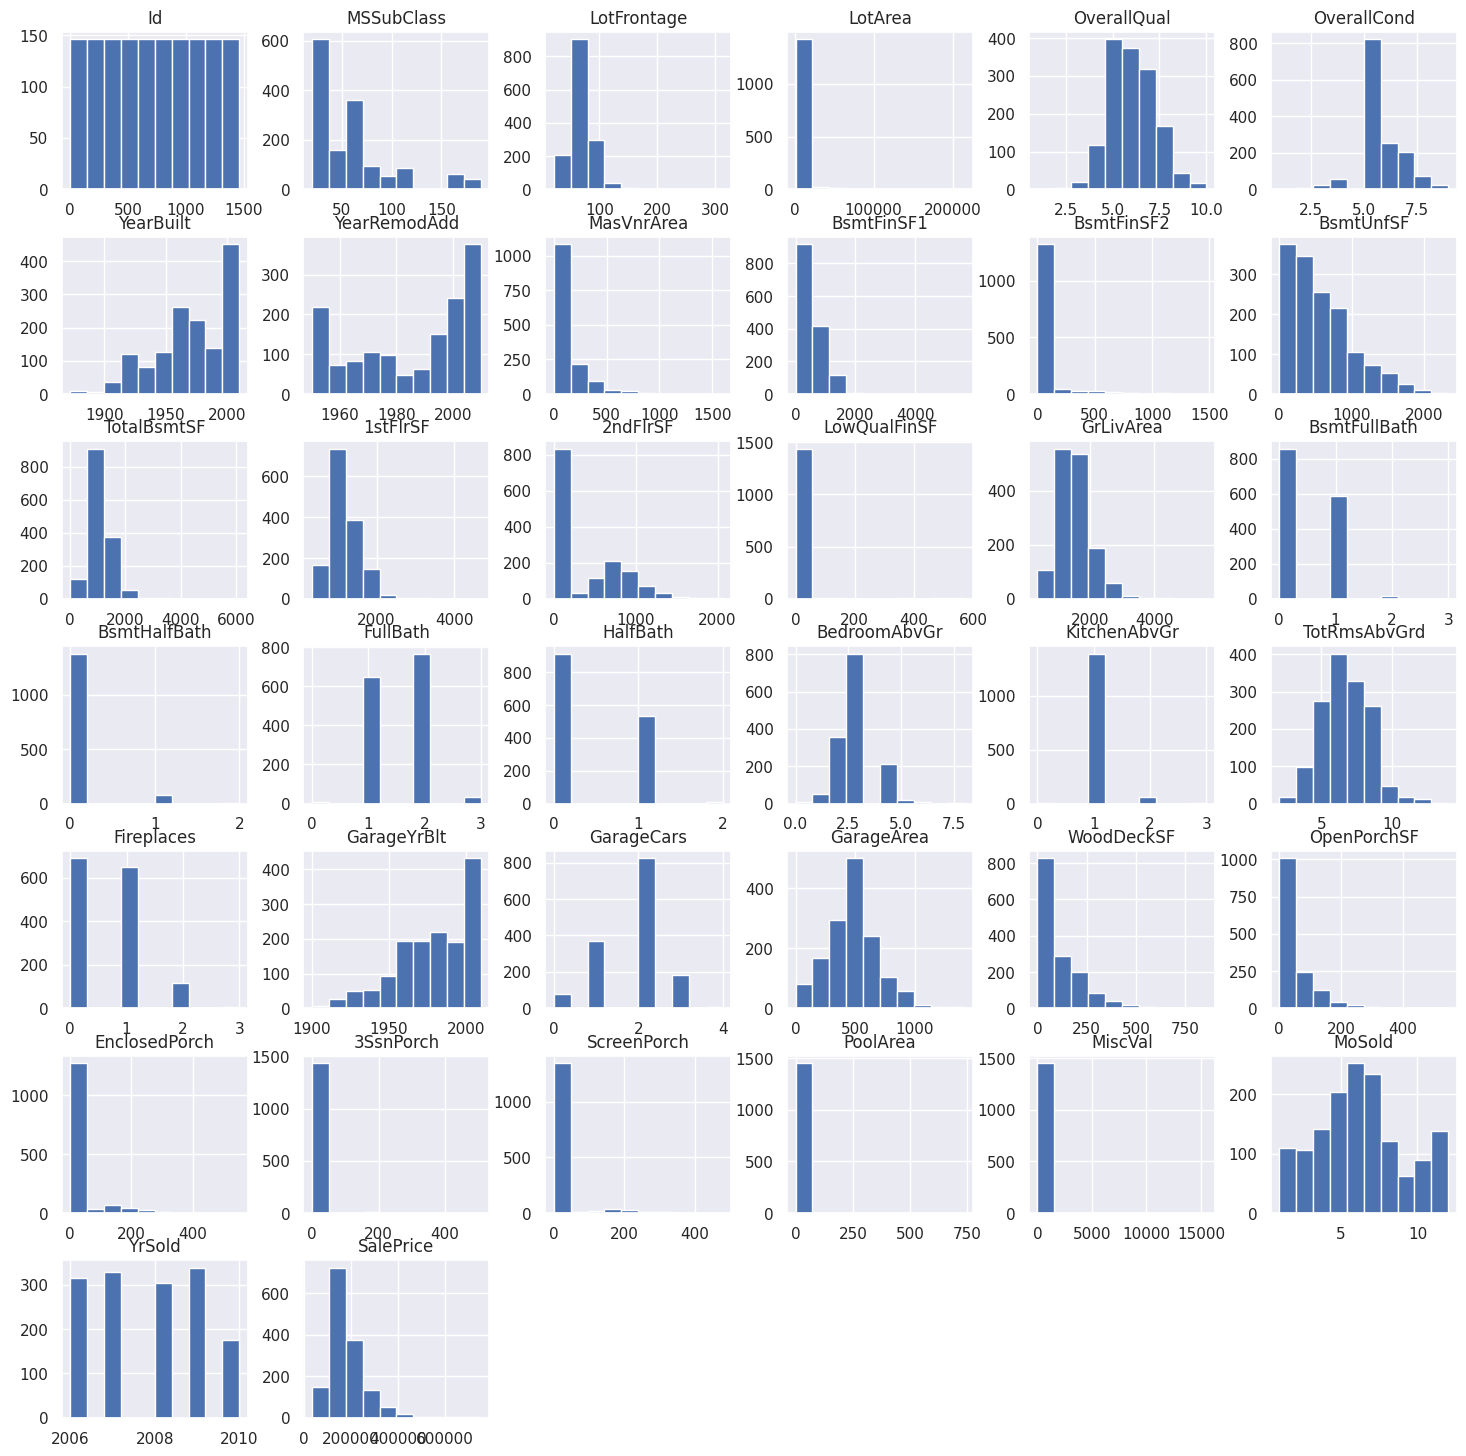

In [7]:
# Plotting histograms for the numerical columns to understand the distribution of numerical features of the dataset to understand the distribution, spread, and possible outliers

num_column = df_train.dtypes[df_train.dtypes != 'object']
df_train[list(num_column.index)].hist(figsize = (18,18));

Similar to the target variable, there are another independent features which are not normally distributed based on the images above and it is therefore better to use log values in df_train and df_test.

Checking for skewness and kurtosis:

In [8]:
# For the numerical features, we will determine and display the skewness and kurtosis for each feature to understand the asymmetry of the distribution.
for col in numerical_feats:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(df_train[col].skew()) ,
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.41     Kurtosis: 021.91
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.14
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

The features LotArea, BsmtFinSF2, LowQualFinSF, 3SsnPorch, ScreenPorch, PoolArea, and MiscVa have highly skewed distribtion. The Kurtosis is significant which indicates probable outliers. As a result, by implementing log transformation would mitigate the impact of the outliers on the model performance

<ipython-input-9-87e55a39be51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['LotArea']);


Skewness: 12.207688
Kurtosis: 203.243271


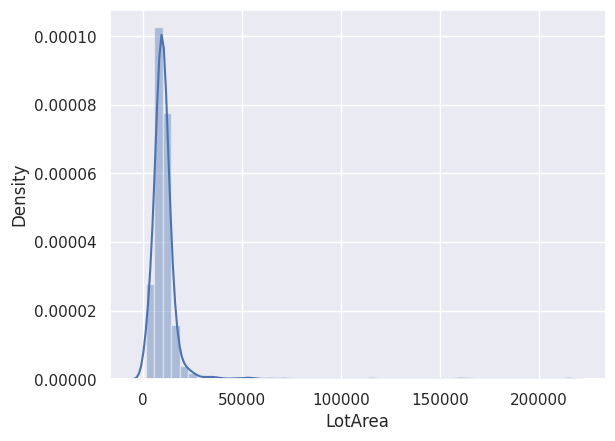

In [9]:
# We will visualize the LotArea feature using a seaborn distplot. We will display the skewness and kurtosis to get more insights.

sns.distplot(df_train['LotArea']);
#skewness and kurtosis
print("Skewness: %f" % df_train['LotArea'].skew())
print("Kurtosis: %f" % df_train['LotArea'].kurt())

In [10]:
# In this program we will use logarithmic transformations to transform a list of features. This list is decided based on their Skewness and Kurtosis distribution observed above.

# List of features to transform
features_to_transform = [
    'LotArea',
    'BsmtFinSF2',
    'LowQualFinSF',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
]

for df in [df_train, df_test]:
    for feature in features_to_transform:
        log_feature_name = f'{feature}_Log'
        df[log_feature_name] = np.log1p(df[feature])  # Using np.log1p to handle zeros gracefully
        df.drop(feature, inplace=True, axis=1)


<ipython-input-11-5ff46a0199fd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['LotArea_Log']);


Skewness: -0.137404
Kurtosis: 4.713822


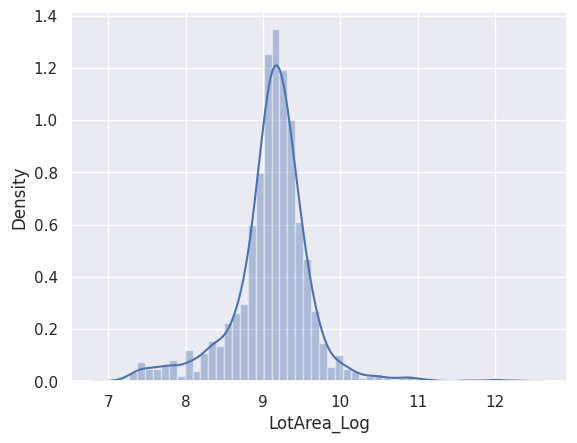

In [11]:
# Skewness and Kurtosis distribution of transformed feature, LotArea_Log using seaborn distplot.

sns.distplot(df_train['LotArea_Log']);
#skewness and kurtosis
print("Skewness: %f" % df_train['LotArea_Log'].skew())
print("Kurtosis: %f" % df_train['LotArea_Log'].kurt())


As we see, the target variable SalePrice is not normally distributed.
This can effect the performance of the ML regression model, as they assume normal distribution.

Therfore we make a log transformation, the resulting distribution looks much better.

<ipython-input-12-ac6809d43a53>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice']);


Skewness: 1.882876
Kurtosis: 6.536282


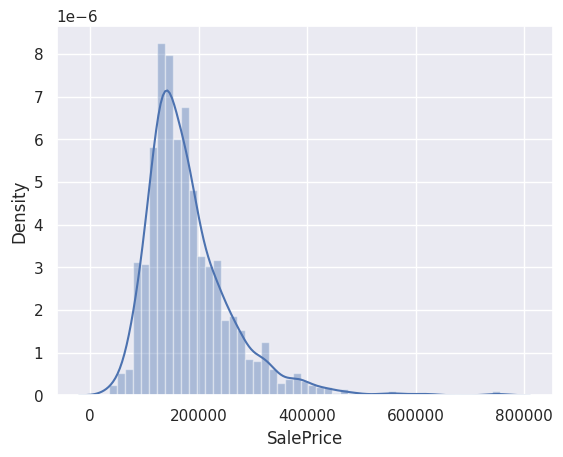

In [12]:
#We will visualize the distribution of variable SalePrice with the help of a seaborn distplot and display the skewness and kurtosis of the target variable

# Distribution of SalePrice(target variable)
sns.distplot(df_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Now, sale price (target variable) looks more like normally distributed

<ipython-input-13-222a1461ecd2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice_Log']);


Skewness: 0.121335
Kurtosis: 0.809532


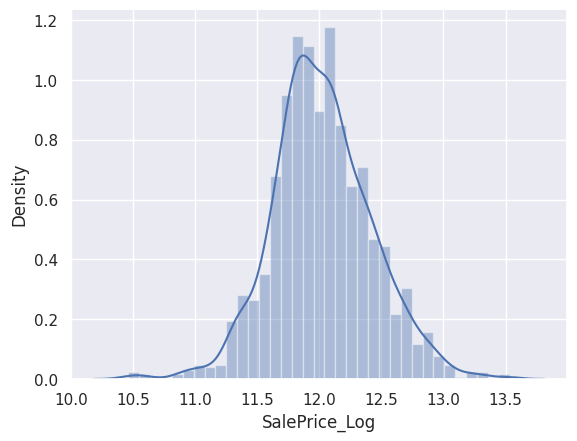

In [13]:
# Logrithmic transformation of SalePrice feature to a new column SalePrice_Log and display it using seaborn distplot and drop the original column SalePrice from the train data

df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())
# dropping old column
df_train.drop('SalePrice', axis= 1, inplace=True)

<Figure size 1600x1000 with 0 Axes>

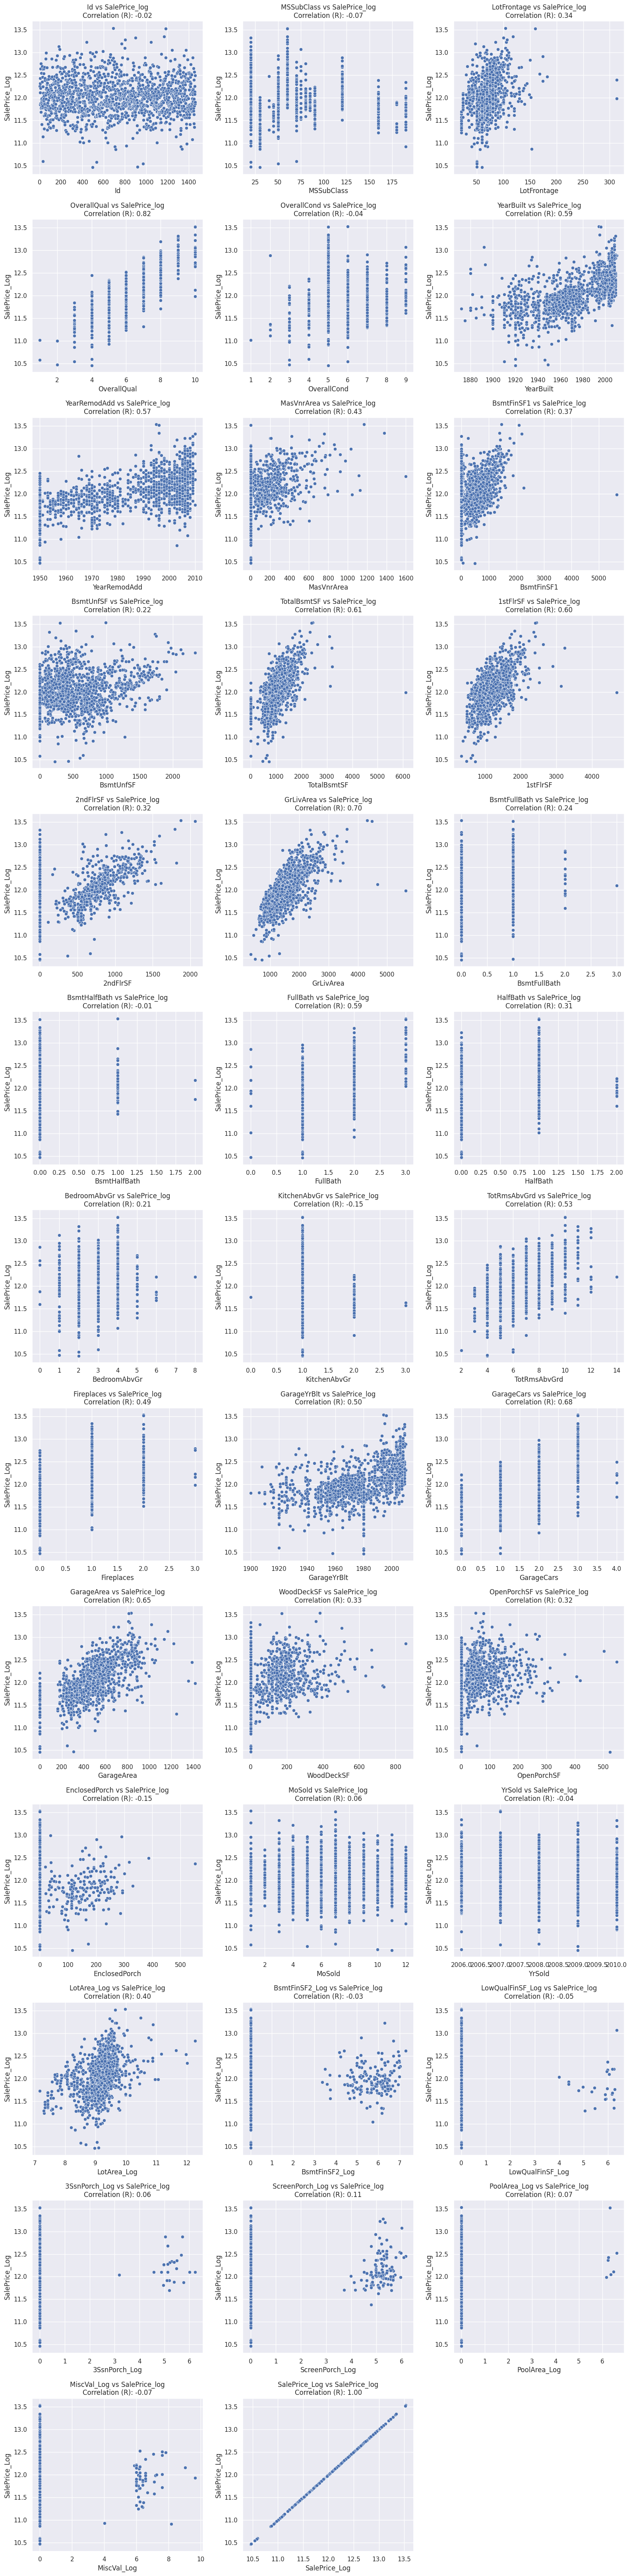

In [14]:
# In this program we will use the Sale Price Feature and plot each numerical feature using a scatterplot and show correlation coefficient as the metric

import math  # Import math module for ceil function
# Extract numerical columns (excluding 'SalePrice')
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set the figure size for the plots
plt.figure(figsize=(16, 10))

# Calculate number of rows and columns for subplot grid
num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)  # Adjust the number of columns (e.g., 3) as needed

# Set the figure size for the plots
plt.figure(figsize=(16, num_rows * 5))

# Loop through each numerical column and plot against 'SalePrice'
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Create subplot with dynamic layout
    sns.scatterplot(x=col, y='SalePrice_Log', data=df_train)
    # Calculate correlation coefficient (R value) between col and 'SalePrice'
    correlation_coeff = np.corrcoef(df_train[col], df_train['SalePrice_Log'])[0, 1]

    # Annotate the plot with the correlation coefficient (R value)
    plt.title(f'{col} vs SalePrice_log\nCorrelation (R): {correlation_coeff:.2f}')

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

Conclusion from EDA on numerical columns:

We see that for some features like 'OverallQual' there is a strong linear correlation (0.82) to the target.

For other features like 'MSSubClass' the correlation is very weak.

For this exercise I decided to use only those features for prediction that have a correlation larger than a threshold value (0.3) to SalePrice.

In [15]:
# Calculate and display the correlation of each numerical feature with the target variable.

# Extract numerical columns (excluding 'SalePrice_Log')
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define empty lists to store column names based on correlation thresholds
low_corr_columns = []
high_corr_columns = []

# Loop through each numerical column and calculate correlation with 'SalePrice'
for col in numerical_columns:
    correlation_coeff = np.corrcoef(df_train[col], df_train['SalePrice_Log'])[0, 1]

    # Categorize columns based on correlation threshold (0.3)
    if correlation_coeff < 0.3:
        low_corr_columns.append(col)
    else:
        high_corr_columns.append(col)

# Display the lists of columns based on correlation thresholds
print("Columns with correlation < 0.3 with SalePrice_Log:")
print(low_corr_columns)

print("\nColumns with correlation >= 0.3 with SalePrice_Log:")
print(high_corr_columns)

Columns with correlation < 0.3 with SalePrice_Log:
['Id', 'MSSubClass', 'OverallCond', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', 'MoSold', 'YrSold', 'BsmtFinSF2_Log', 'LowQualFinSF_Log', '3SsnPorch_Log', 'ScreenPorch_Log', 'PoolArea_Log', 'MiscVal_Log']

Columns with correlation >= 0.3 with SalePrice_Log:
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotArea_Log', 'SalePrice_Log']


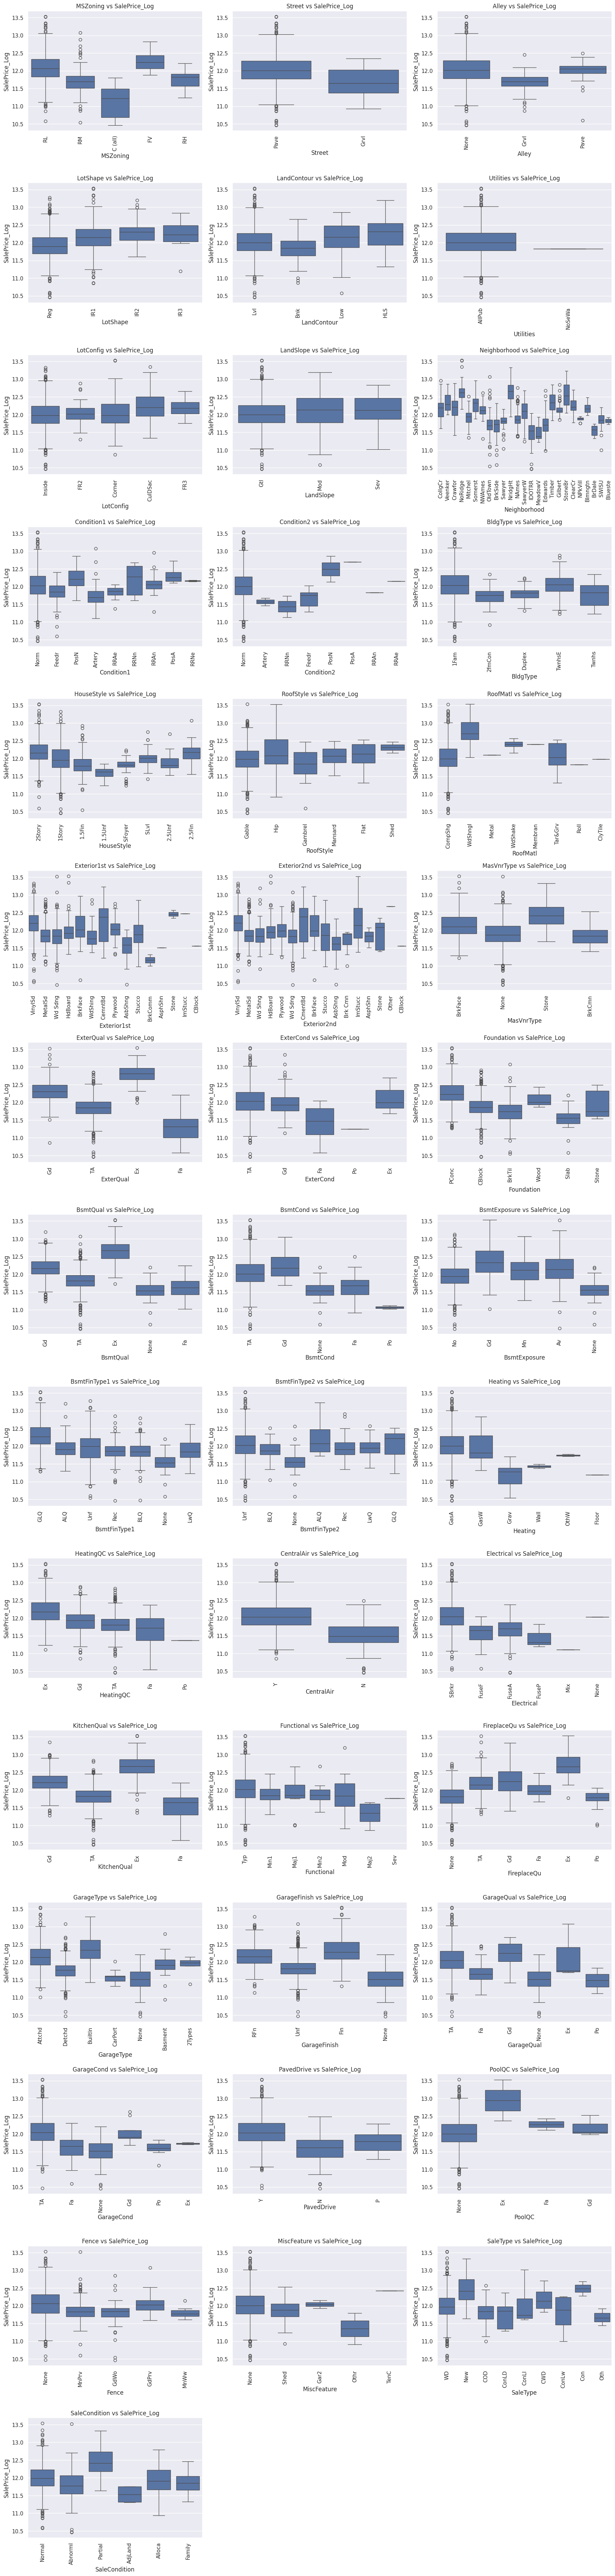

In [16]:
# Plot each categorical variable with the target variable (sale price log).

# Extract categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

# Calculate number of rows and columns for subplot grid
num_cols = 3  # Number of subplots per row
num_rows = (len(categorical_columns) - 1) // num_cols + 1  # Number of rows based on number of columns

# Set the figure size for the plots
plt.figure(figsize=(18, 5 * num_rows))

# Loop through each categorical column and plot against 'SalePrice_Log'
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    sns.boxplot(x=col, y='SalePrice_Log', data=df_train)
    plt.title(f'{col} vs SalePrice_Log')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Hide empty subplots if needed
    if i > len(categorical_columns):
        plt.axis('off')

# Adjust layout parameters for better spacing between subplots
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [17]:
# In this program we will define correlation coefficient between various categorical variables and Sale Price Log. We will calculate correaltion coefficient using Cramer's V for
# each categorical variable to determine their correlation to the target variable..

import pandas as pd
from scipy.stats import chi2_contingency

# Define correlation threshold (Cramér's V)
correlation_threshold_categorical = 0.2

# List to store column categories
low_corr_categorical_columns = []
high_corr_categorical_columns = []

# Function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Loop through each categorical feature and calculate correlation with 'SalePrice'
for feature in categorical_feats:  # Assuming categorical_features contains the list of categorical features
    corr = cramers_v(df_train[feature], df_train['SalePrice_Log'])

    # Categorize columns based on correlation threshold
    if abs(corr) < correlation_threshold_categorical:
        low_corr_categorical_columns.append(feature)
    else:
        high_corr_categorical_columns.append(feature)

print("Categorical columns with low correlation:")
print(low_corr_categorical_columns)
print("\nCategorical columns with high correlation:")
print(high_corr_categorical_columns)


Categorical columns with low correlation:
['Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']

Categorical columns with high correlation:
['MSZoning', 'Street', 'LotShape', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'SaleType', 'SaleCondition']


From the above output, we can see that certain categorical columns have higher correlation with SalePRice_Log target variable. This indicates that there are more important in predicting house sale prices. We can also observe that certain categorical columns show low correlation. This indicates that they are less important for prediction of house sale prices.

In [18]:
# Drop all columns with low correlation to SalePrice
id_test = df_test['Id']

to_drop_num  = low_corr_columns
to_drop_catg = low_corr_categorical_columns

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

Converting categorical columns to numerical columns

In [19]:
# In this program we will convert the categorical columns to numerical columns

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column in df_train and df_test
for col in df_train.select_dtypes(include='object').columns:
    # Fit LabelEncoder on combined data (train + test) to handle unseen categories
    combined_data = pd.concat([df_train[col], df_test[col]], axis=0)
    label_encoder.fit(combined_data)

    # Transform categorical values to numerical labels
    df_train[col] = label_encoder.transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

Checking for multicollinearity

In [20]:
# Calculates and displays the correlation matrix that provides insights into the relationship between various numerical features in the dataset

import pandas as pd

# Select numerical columns excluding the target variable
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('SalePrice_Log')  # Remove the target column

# Create a DataFrame of numerical features
df_numerical = df_train[numerical_columns]

# Compute correlation matrix for df_train (or df_test_encoded)
corr_matrix = df_numerical.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
               MSZoning  LotFrontage    Street  LotShape  OverallQual  \
MSZoning       1.000000    -0.058994  0.089783  0.023820    -0.153562   
LotFrontage   -0.058994     1.000000 -0.037349 -0.138877     0.234812   
Street         0.089783    -0.037349  1.000000 -0.010224     0.058823   
LotShape       0.023820    -0.138877 -0.010224  1.000000    -0.190497   
OverallQual   -0.153562     0.234812  0.058823 -0.190497     1.000000   
YearBuilt     -0.285236     0.116685  0.021137 -0.226062     0.572323   
YearRemodAdd  -0.176666     0.083348  0.065465 -0.153825     0.550684   
MasVnrType    -0.043391    -0.017693  0.010007  0.007946     0.004407   
MasVnrArea    -0.053109     0.178469  0.017108 -0.106178     0.407252   
ExterQual      0.198782    -0.184120  0.049976  0.148818    -0.634319   
ExterCond     -0.087835     0.048300  0.005874 -0.029497     0.138581   
Foundation    -0.223529     0.098418  0.035277 -0.135124     0.396186   
BsmtQual       0.157057    -0.1

In [21]:
# Setting correlation threshold to identify and display highly correlated feature pairs along with the values present in the correlation matrix
# Set correlation threshold to identify highly correlated features
correlation_threshold = 0.7

# Find pairs of highly correlated features
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
for pair in corr_pairs:
    print(pair)

Highly Correlated Feature Pairs:
('YearBuilt', 'GarageYrBlt', 0.7771817647425319)
('TotalBsmtSF', '1stFlrSF', 0.8195299750050339)
('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088425)
('GarageCars', 'GarageArea', 0.882475414281462)


In [22]:
# Dropping one of the highly correlated feature with correlation threshold grater than 0.7 and then have the final train and test dataframe for the model building
correlation_threshold = 0.7

# Create a set to track columns to drop
columns_to_drop = set()

# Iterate over correlated feature pairs and drop one of each pair
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            column1 = corr_matrix.columns[i]
            column2 = corr_matrix.columns[j]
            # Decide which feature to drop based on importance or redundancy
            # Here, we drop the feature with less importance or based on domain knowledge
            columns_to_drop.add(column2)  # Add feature2 to columns_to_drop

# Drop collinear columns from the original DataFrame
df_train_final = df_train.drop(columns=columns_to_drop)
df_test_final = df_test.drop(columns=columns_to_drop)

Linear regression Model

In [23]:
# In this program we divide the dataset into 70% train and 30% validation set (test) data

from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    df_train_final.drop(columns=['SalePrice_Log']),  # Features (excluding target)
    df_train_final['SalePrice_Log'],  # Target variable
    test_size=0.3,  # 30% of data for validation
    random_state=42  # Set random state for reproducibility
)

In [25]:
# In this program we will initialize the Standard scaler and use the fit and transform scaler on train data

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform scaler on training data features
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [26]:
# In this code, we will initialize linear regression model, conduct the k-fold cross-validation on the training data, and display the cross-validation scores along with their mean
# We will also train the model on the 70% training data, use the validation set to evaluate it and display the calculated MSE and R2 score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
model = LinearRegression()

# Perform k-fold cross-validation on training data
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())

# Train the model on the entire training data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_valid_pred = model.predict(X_valid_scaled)

# Calculate evaluation metrics on the validation set
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

# Display evaluation metrics on the validation set
print("\nValidation Set Metrics:")
print("Mean Squared Error (MSE) on Validation Set:", mse_valid)
print("R-squared (R2) Score on Validation Set:", r2_valid)

Cross-Validation R-squared Scores: [0.88356537 0.88411951 0.72616114 0.53992946 0.88250617 0.88781681
 0.8579491  0.89351619 0.80376041 0.90927976]
Mean R-squared Score: 0.8268603901684095

Validation Set Metrics:
Mean Squared Error (MSE) on Validation Set: 0.02359030336356444
R-squared (R2) Score on Validation Set: 0.8609440810853235


In [27]:
# This program scales the test features from the test data, make predictions using the  linear regression model used above and display the Sale Price Log and corresponding SalePrice

# Scale test features using the fitted scaler from test data
X_test_scaled = scaler.transform(df_test_final)

# Make predictions on the test data
y_test_pred = model.predict(X_test_scaled)

# Display the predicted SalePrice_Log for the test data
df_test_final['SalePrice_Log_Pred'] = y_test_pred
df_test_final['SalePrice_Pred'] = np.exp(df_test_final['SalePrice_Log_Pred'])
df_test_final.head(6)

MSZoning  LotFrontage  Street  LotShape  OverallQual  YearBuilt  \
0         3         80.0       1         3            5       1961   
1         4         81.0       1         0            6       1958   
2         4         74.0       1         0            5       1997   
3         4         78.0       1         0            6       1998   
4         4         43.0       1         0            8       1992   
5         4         75.0       1         0            6       1993   

   YearRemodAdd  MasVnrType  MasVnrArea  ExterQual  ...  FireplaceQu  \
0          1961           2         0.0          3  ...            3   
1          1958           1       108.0          3  ...            3   
2          1998           2         0.0          3  ...            5   
3          1998           1        20.0          3  ...            2   
4          1992           2         0.0          2  ...            3   
5          1994           2         0.0          3  ...            5   

   GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  SaleType  SaleCondition  \
0             3         1.0         140            0         9              4   
1             3         1.0         393           36         9              4   
2             0         2.0         212           34         9              4   
3             0         2.0         360           36         9              4   
4             2         2.0           0           82         9              4   
5             0         2.0         157           84         9              4   

   LotArea_Log  SalePrice_Log_Pred  SalePrice_Pred  
0     9.360741           11.689345   119293.789937  
1     9.565775           11.960805   156498.942589  
2     9.534668           12.120474   183592.493152  
3     9.208238           12.183952   195624.394051  
4     8.518392           12.161023   191189.954488  
5     9.210440           12.102821   180379.982830  

[6 rows x 35 columns]

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


Description of BERT


BERT is a pre-trained model with a vast corpus that includes BooksCorpus and English Wikipedia. This model employs transformer architecture that includes attention mechanisms. This is available in different sizes; for applications such as sentiment analysis. Its parameters can be fine-tuned. But for this assignment we will use in a zero-shot capacity without any fine-tuning.



In [32]:
# In this program we will implement BERT model for sentiment analysis on the amazon review dataset from assignment 3. We will define, and perform sentiment analysis on every review. We will convert sentimenets to numerical values
# and calculate accuracy, precision, recall, and F1 score to evaluet the performance of the model

from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset (assuming it's already loaded and preprocessed as in previous code)
data = pd.read_csv('Amazon_reviews_Assignment_3_Q4.csv')

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define a function to perform sentiment analysis using BERT
def predict_sentiment(review_text):
    inputs = tokenizer(review_text, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    return predicted_label

# Perform sentiment analysis using BERT on each review text
predictions = [predict_sentiment(review) for review in data['Review']]

# Convert true sentiment labels to numerical values ('positive' as 1 and 'negative' as 0)
true_sentiments = [1 if sentiment == 'positive' else 0 for sentiment in data['Sentiment']]

# Evaluate model performance
accuracy = accuracy_score(true_sentiments, predictions)
precision = precision_score(true_sentiments, predictions)
recall = recall_score(true_sentiments, predictions)
f1 = f1_score(true_sentiments, predictions)

# Print performance metrics
print("BERT Sentiment Analysis Metrics:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Sentiment Analysis Metrics:
Accuracy: 0.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Advantages and Challenges of BERT for Sentiment Analysis
Advantages:

1. As BERT has a bidirectional transformer design, it can use text contextual awareness which makes it effective fore different NLP applications including senitment analysis.
2. Using zero short learning it can provide quick insights on sentiment polarity
3. BERT can recognizesubtle sentiments in the text

Disadvantages:
1. Computationally costly due to enormous model size
2. Words not commonly used can cause BERT to perform poorly on particular datasets or usecase
3. Determining the right BERT variant is important for performance improvement


Sentiment analysis involves automatically depicting the sentiment of a piece of text, as positive, negative, or neutral.

Sentiment analysis is a library from Hugging Face was used. This enables the classification of text into positive, negative, or neutral sentiment with the help of NLP models

In [33]:
# In this program we will utilize the sentiment- analysis from hugging face transformers to create sentiment analysis.
#We will preprocess the data apply sentiment prediction to each review prepare a confusion matrix.

from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

# Load the dataset
data = pd.read_csv("Amazon_reviews_Assignment_3_Q4.csv")

# Function to preprocess and clean the review text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, punctuation, and extra spaces
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Function to predict sentiment using the pipeline
def predict_sentiment(review):
    try:
        cleaned_review = preprocess_text(review)
        result = sentiment_pipeline(cleaned_review)
        predicted_label = result[0]['label']
        return predicted_label
    except Exception as e:
        print(f"Error predicting sentiment for review: {review}")
        print(e)
        return 'unknown'  # Handle errors by returning a default label or logging the issue

# Apply sentiment prediction to each review in the DataFrame
data['predicted_sentiment'] = data['Review'].apply(predict_sentiment)

# Define sentiment labels for the confusion matrix
sentiment_labels = ['positive', 'negative', 'neutral']

# Convert sentiment labels to lowercase for consistency
data['Sentiment'] = data['Sentiment'].str.lower()
data['predicted_sentiment'] = data['predicted_sentiment'].str.lower()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1385 > 512). Running this sequence through the model will result in indexing errors


Error predicting sentiment for review: I listen to a lot of audio books so I suppose the RCA Lyra RD2850A 20G HDD mp3pro Player seemed like a great Christmas present for me.  And I have to admit that having an mp3 player with more capacity than my PC's old D: drive was a bit of a kick.  The unit is pretty large so it doesn't hide unobtrusively in my jeans pocket like my old Creative MuVo did, but that's ok, I'll clip it to my waistband and hope it stays there.<br />As an engineer, I don't usually RTFM.  I didn't.  The Lyra has a USB I/F and a FAT file system, so Windows 2000 automagically recognizes it as a Removable Disk.  I proceeded to drag and drop 20G of audio books into it, almost 1500 files, into the directory called \MUSIC\.  That's a lot of audio since I listen mostly to low bit rate lectures.  Impressive!<br />A little bit of random button-pushing got the device to profile the contents.  This took a while to complete, but that's fine, consider it part of the initial setup.  A

Accuracy: 0.3671
Precision: 0.4290
Recall: 0.7436
F1 Score: 0.5441


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


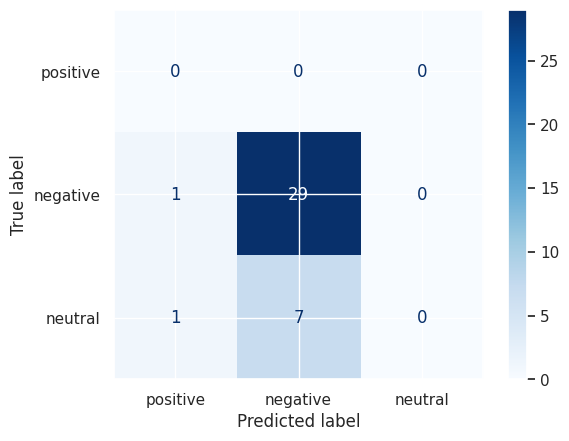

In [34]:
# In this program we will create a confusion matrix, and calculate metrics such as accuracy, precision, recall, and F1 score to evaluate the performance of the sentiment analysis model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create confusion matrix
cm = confusion_matrix(data['Sentiment'], data['predicted_sentiment'], labels=sentiment_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(data['Sentiment'], data['predicted_sentiment'])
precision = precision_score(data['Sentiment'], data['predicted_sentiment'], average='weighted', labels=sentiment_labels)
recall = recall_score(data['Sentiment'], data['predicted_sentiment'], average='weighted', labels=sentiment_labels)
f1 = f1_score(data['Sentiment'], data['predicted_sentiment'], average='weighted', labels=sentiment_labels)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sentiment_labels)
disp.plot(cmap='Blues', values_format='d')

Advantages and Challenges of Transformers for sentiment analysis

Advantages
1. Parallel processing of data and complex relationships in sequential data
2. Pre-trained transformers can be adapted to new applications using transfer learning
3. Support wide range of NLP tasks

Disadvantages
1. Require substantial computing resources and memory due to large model size
2. Can inherit data dias from the training data
3. Require optimization and consideration of resource constraints during deployement